<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Trabajo Practico</h3>
    <h5>Grupo 4</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Braian Drago <p>
        <p>Integrantes: Garnica Hernán - Scime Silvia
</div>

Importamos modulos a utilizar

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

####  Leemos los datos a trabajar


In [78]:
url='https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/Kilometros_TP.csv'
raw_csv_data = pd.read_csv(url, sep=',', decimal='.')
df_km=raw_csv_data.copy()

#### Breve resumen del dataset


In [79]:
print(df_km.columns)

Index(['Fecha', 'KM'], dtype='object')


In [80]:
df_km.describe(include='all')

,Fecha,KM
count,761,761.000000
unique,761,NaN
top,2023-03-18,NaN
freq,1,NaN
mean,NaN,73506.130891
std,NaN,23975.028897
min,NaN,18.976000
25%,NaN,52063.096000
50%,NaN,75190.790000
75%,NaN,96904.004000


In [81]:
df_km.head(10)

,Fecha,KM
0,2023-03-18,66686.513
1,2023-05-09,105009.277
2,2023-02-28,80447.065
3,2023-03-06,103403.154
4,2023-03-10,102574.717
5,2023-05-11,104149.399
6,2023-03-21,102278.464
7,2023-04-24,103627.203
8,2023-04-18,103366.435
9,2023-05-31,103403.519


In [82]:
df_km.tail(10)

,Fecha,KM
751,2022-04-09,48305.086
752,2022-01-29,47482.883
753,2023-07-23,45117.943
754,2022-01-11,50103.326
755,2022-12-18,17554.422
756,2022-04-26,23536.646
757,2023-06-13,47.508
758,2022-10-12,49.673
759,2022-05-17,54.524
760,2022-10-13,18.976


Adaptamos el dataset para trabajarlo segun sus series temporales

In [83]:
df_km.Fecha = pd.to_datetime(df_km.Fecha, dayfirst = True)

In [84]:
df_km.Fecha.describe()

count                              761
mean     2022-10-15 04:07:53.061760768
min                2021-09-30 00:00:00
25%                2022-04-08 00:00:00
50%                2022-10-15 00:00:00
75%                2023-04-23 00:00:00
max                2023-10-31 00:00:00
Name: Fecha, dtype: object

Aplicamos filtro de 2 años de duración al campo Fecha (2021-10-01-2023-10-31)

In [85]:
df_km = df_km[(df_km['Fecha'] >= '2021-10-01') & (df_km['Fecha'] <= '2023-10-31')]
df_km = df_km.sort_values(by=['Fecha'], ascending=True)

In [86]:
df_km.head(10)

,Fecha,KM
323,2021-10-01,73177.190
272,2021-10-02,49300.256
234,2021-10-03,34024.972
315,2021-10-04,73453.515
152,2021-10-05,73722.635
80,2021-10-06,73465.563
572,2021-10-07,49462.478
265,2021-10-08,35282.426
307,2021-10-09,48384.782
29,2021-10-10,34785.451


In [87]:
df_km.tail(10)

,Fecha,KM
333,2023-10-22,47321.881
450,2023-10-23,101572.556
594,2023-10-24,101884.237
52,2023-10-25,102691.406
403,2023-10-26,102253.728
75,2023-10-27,102590.551
337,2023-10-28,62622.827
748,2023-10-29,44060.420
390,2023-10-30,101843.308
196,2023-10-31,102381.640


In [88]:
from skimpy import skim

In [89]:
skim(df_km)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 760    │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ KM              │   0 │      0 │   74000 │   24000 │  19 │   52000 │   75000 │   97000 │  110000 │  ▁▅▃▅▇  │  │
│ └─────────────────┴─────┴────────┴─────────┴─────────┴─────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Fecha                  │      0 │         0 │     2021-10-01      │     2023-10-31      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Seteamos como index del dataset segun el dia

In [90]:
df_km.set_index("Fecha",inplace=True)

In [91]:
df_km.head()

,KM
Fecha,
2021-10-01,73177.190
2021-10-02,49300.256
2021-10-03,34024.972
2021-10-04,73453.515
2021-10-05,73722.635


#### Adaptamos el datset a la frecuencia diaria

In [92]:
df_km=df_km.asfreq('d')
df_km

,KM
Fecha,
2021-10-01,73177.190
2021-10-02,49300.256
2021-10-03,34024.972
2021-10-04,73453.515
2021-10-05,73722.635
...,...
2023-10-27,102590.551
2023-10-28,62622.827
2023-10-29,44060.420


Verificamos existencia de fechas nulas

In [93]:
df_km.isna().sum()

KM    1
dtype: int64

Obtenemos posición del registro con fecha nula

In [94]:
fila_con_na = df_km[df_km.isna().any(axis=1)]

In [95]:
print(fila_con_na)

            KM
Fecha         
2023-06-22 NaN


Este día no aparece en el dataset, lo borramos para poder seguir con el análisis.

In [96]:
df_km=df_km.dropna()

Volvemos a verificar existencia de fechas nulas

In [97]:
df_km.isna().sum()

KM    0
dtype: int64

## Punto 2

Visualizamos el dataset teniendo en cuenta la serie temporal

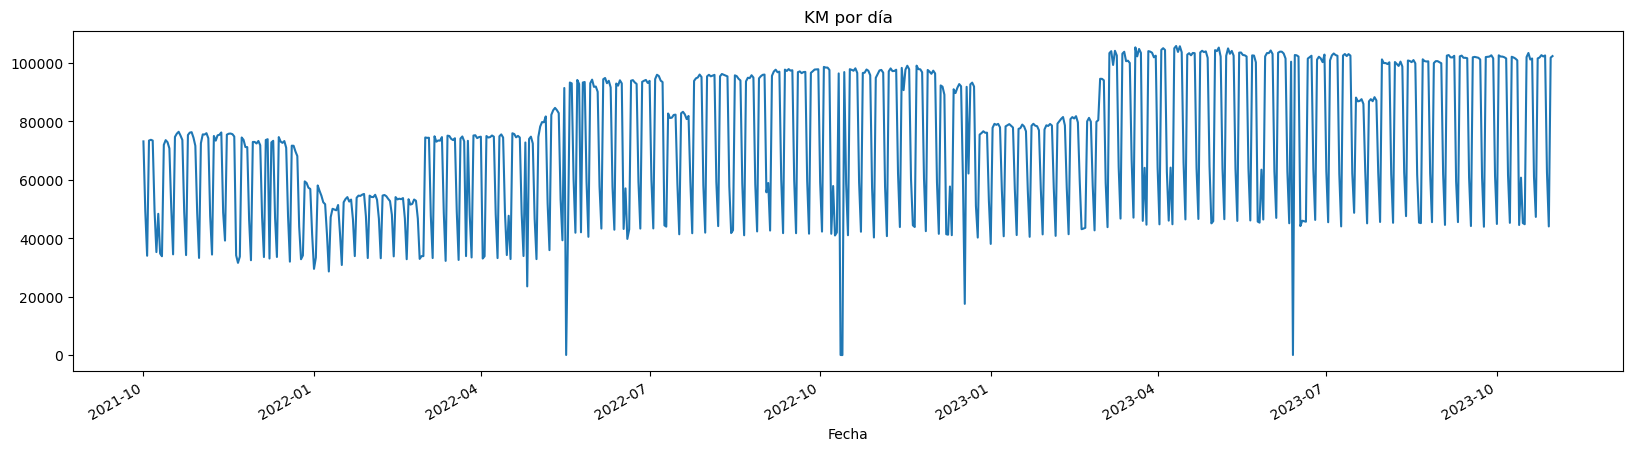

In [98]:
df_km.KM.plot(figsize=(20,5), title = "KM por día")
plt.show()

Observación

El gráfico hace referencia a los kms diarios recorridos por las líneas Urbanas en la ciudad de Buenos Aires. Es la primer visualización de la serie de tiempo y se aprecian algunos valores iguales a 0 kms recorridos en determinadas fechas. Habrá que seguir estudiando a fin de decidir qué pasa con esos datos y el tratamiento pertinente de los mismos. 

<Axes: ylabel='KM'>

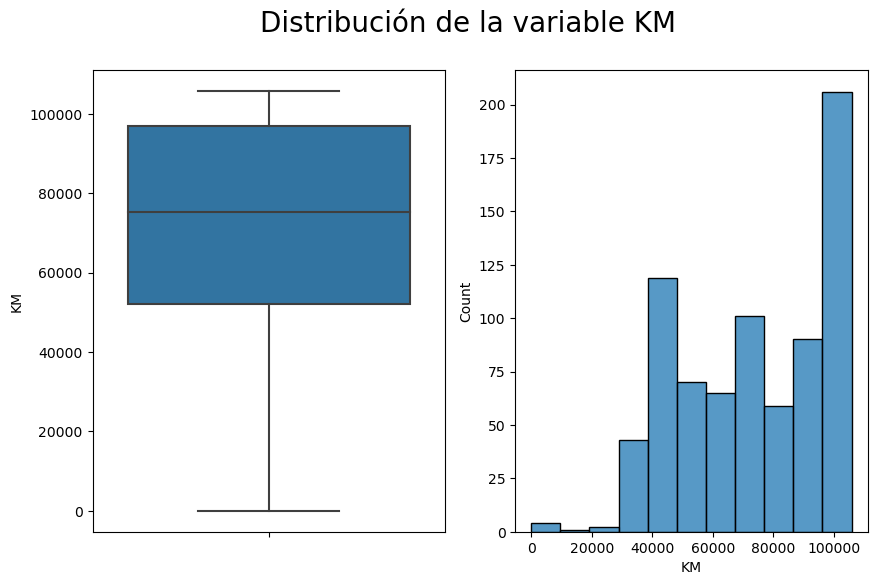

In [99]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle('Distribución de la variable KM', fontsize = 20)


sns.histplot(data = df_km, x="KM", ax = axs[1])
sns.boxplot(y = "KM", data = df_km, ax = axs[0])


La variable parece no seguir una distribución en particular, los kms recorridos por día se encuentran entre 50.000 y 100.000,
siendo este último valor el más frecuente.

Descomposición de Series Temporales

In [100]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

Descomposicion Aditiva

In [101]:
df_km = df_km.asfreq('d')
df_km = df_km.fillna(1)

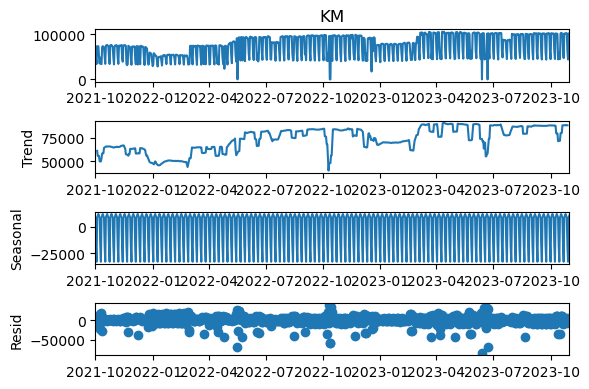

In [102]:
s_dec_additive = seasonal_decompose(df_km.KM, model = "adittive")
s_dec_additive.plot()
plt.show()

Al hacer la descomposición de la serie se pueden observar 4 características:
- El ciclo
- La tendencia   
- La estacionalidad.
- Movimientos irregulares ( el error )

Descomposicion Multiplicativa

In [103]:
import matplotlib

matplotlib.rcParams['figure.figsize']=[12.0,8.0]

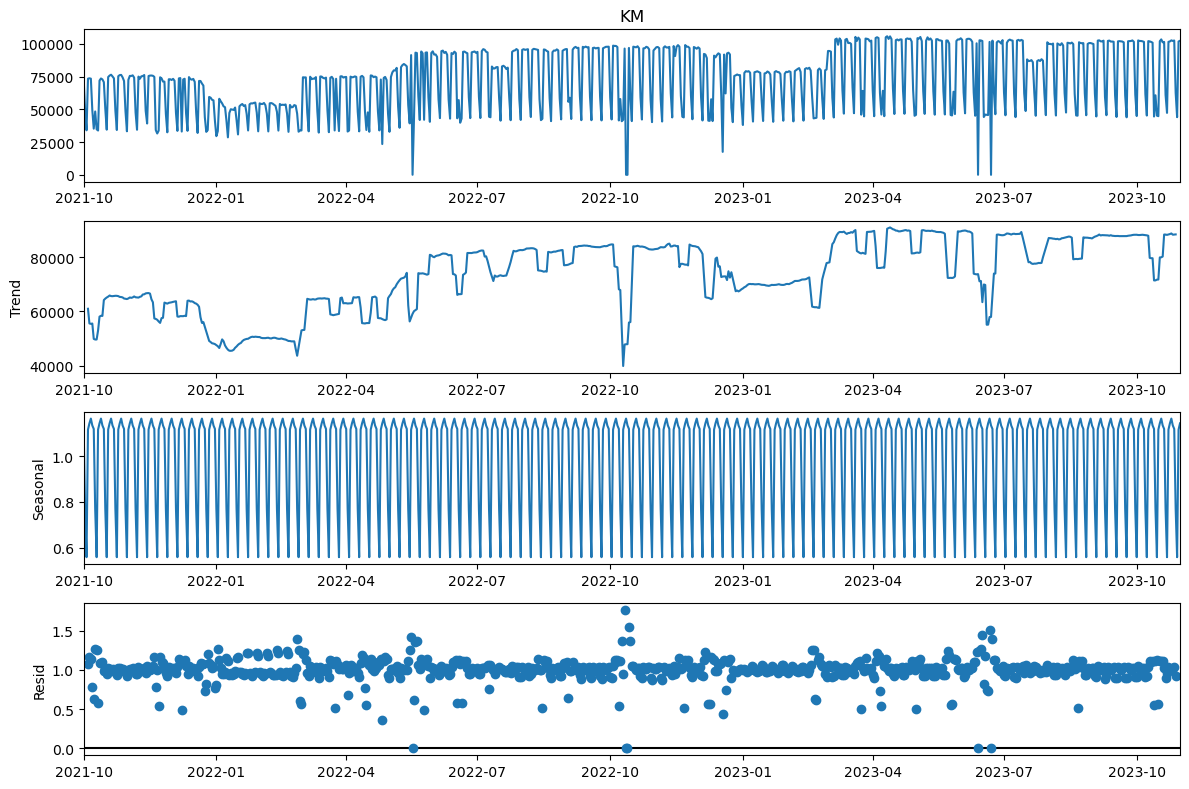

In [104]:
s_dec_multiplicative = seasonal_decompose(df_km.KM, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

Se observa una marcada estacionalidad.

Representación gráfica de la Función de Autocorrelación

In [105]:
# Módulos a utilizar
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [106]:
matplotlib.rcParams['figure.figsize']=[6.0,4.0]

Grafico ACF de los KM

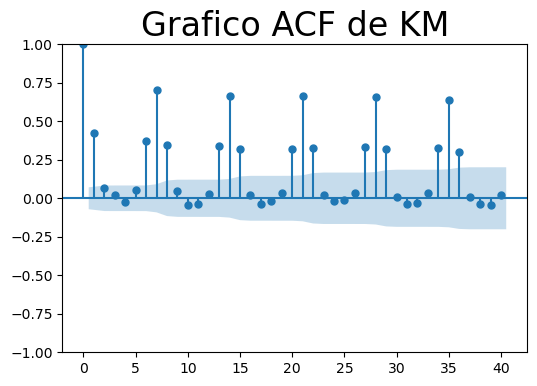

In [107]:
plot_acf(df_km.KM,lags=40)
plt.title("Grafico ACF de KM", size= 24)
plt.show()

Observaciones

El grafico de autocorrelación nos da una primera aproximación de no estacionariedad.
Con 20 lags no se alcanza a percibir el decrecimiento lineal con tendencia a bajar en el tiempo. Se procede a aumentar la cantidad de lags

Grafico ACF del indice "KM" (200 lags)

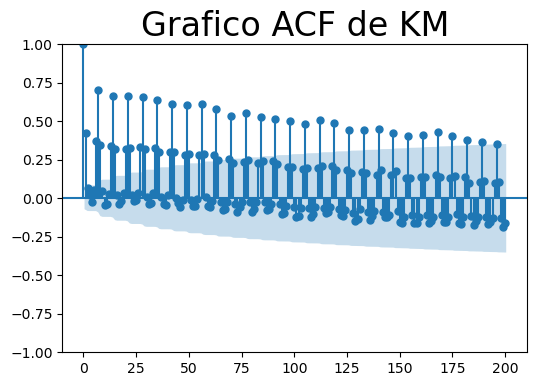

In [108]:
plot_acf(df_km.KM,lags=200)
plt.title("Grafico ACF de KM", size= 24)
plt.show()

Aplicamos transformación de la serie.

In [109]:
primera_diffs=df_km.KM.values[1:]-df_km.KM.values[:-1]
primera_diffs=np.concatenate([primera_diffs,[0]])

In [110]:
df_km['primera_diffs_km']=primera_diffs

In [111]:
df_km.head()

,KM,primera_diffs_km
Fecha,,
2021-10-01,73177.190,-23876.934
2021-10-02,49300.256,-15275.284
2021-10-03,34024.972,39428.543
2021-10-04,73453.515,269.120
2021-10-05,73722.635,-257.072


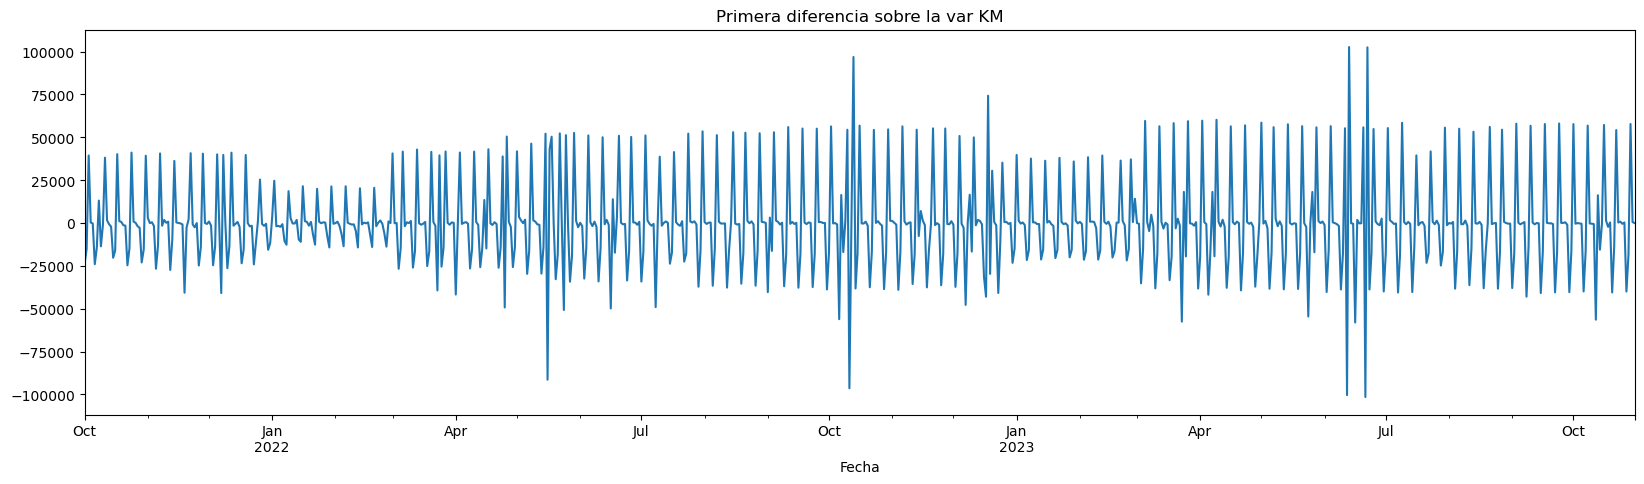

In [112]:
#grafico este indice con las diferencias aplicadas fila a fila
df_km.primera_diffs_km.plot(figsize=(20,5), title = "Primera diferencia sobre la var KM")
plt.show()

Observaciones

La grafica de la primera diferencia de la serie original muestra característica de Ruido blanco

- TIENE REVERSION A LA MEDIA
- VALOR ESPERADO CONSTANTE = 0
- VOLATILIDAD CONSTANTE EN EL TIEMPO

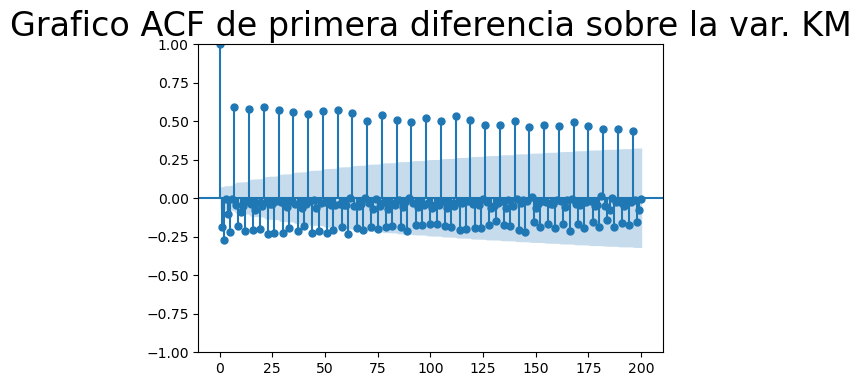

In [113]:
plot_acf(df_km.primera_diffs_km,lags=200)
plt.title("Grafico ACF de primera diferencia sobre la var. KM", size= 24)
plt.show()

Observación

Vemos en la función de autocorrelación de la primera diferencia de la serie original un cambio no tanto más marcado respecto a la serie original. 
El mismo nos podría dar a la interpretación que estamos en presencia de una serie estacionaria pero se necesitaron 200 lags para reconocer la tendencia. Por lo tanto se necesita testear para llegar a la conclusión definitiva.


Ruido Blanco

In [114]:
wn = np.random.normal(loc = df_km.KM.mean(), scale = df_km.KM.std(), size = len(df_km))
df_km['wn'] = wn
df_km.describe()

,KM,primera_diffs_km,wn
count,761.000000,761.000000,761.000000
mean,73410.293046,38.376413,72389.155936
std,24122.636640,25857.390068,23448.115764
min,1.000000,-101512.827000,264.119225
25%,51774.760000,-14496.892000,56302.065619
50%,75190.790000,-408.059000,73016.871302
75%,96904.004000,824.477000,88839.012168
max,105834.661000,102697.108000,153595.064254


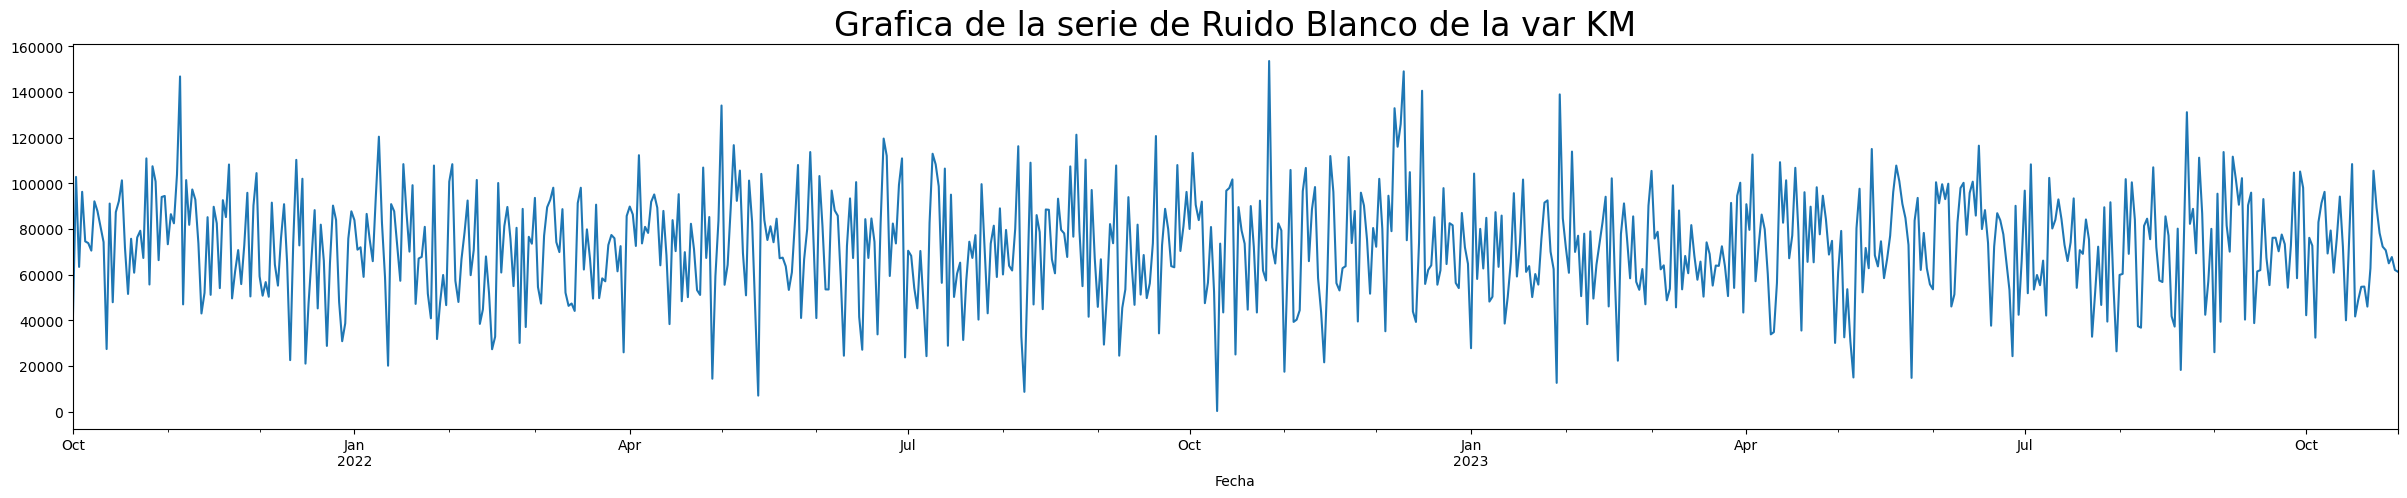

In [115]:
df_km.wn.plot(figsize = (30,5))
plt.title("Grafica de la serie de Ruido Blanco de la var KM", size= 24)
plt.show()

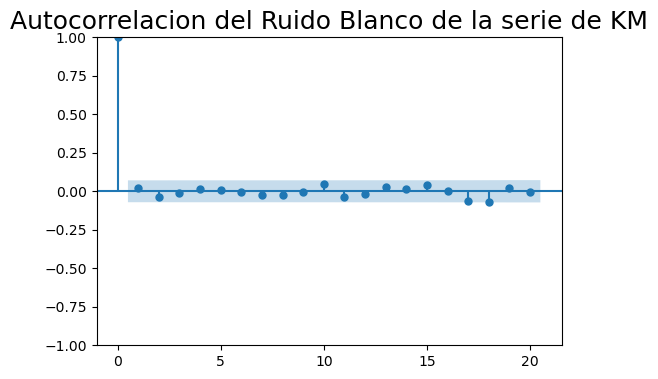

In [116]:
plot_acf(df_km.wn, lags=20)
plt.title("Autocorrelacion del Ruido Blanco de la serie de KM", size= 18)
plt.show()

In [129]:
# Diferenciar la serie
km_diff= df_km.copy()
km_diff=km_diff.diff(axis = 0, periods = 1)
#km_diff.drop(['2021-09-30'], inplace=True)

## Punto 3
Graficas de FAS, FAC y FACP

In [117]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as tsa

In [118]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2,figsize=(18,10),sharex=True, sharey=False )
  axes[2,0].set_xlabel('Lag')
  axes[2,1].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Serie 1: Residentes')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')

  plot_acf(serie_nr, lags=nrol, ax= axes[0,1], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Repito grafico: Residentes')
  plot_pacf(serie_nr, lags=nrol, ax= axes[1,1], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,1].plot(tsa.acovf(serie_nr,fft=False, nlag=nrol), color='r', label='AutoCov')

  p1.legend()
  plt.show()

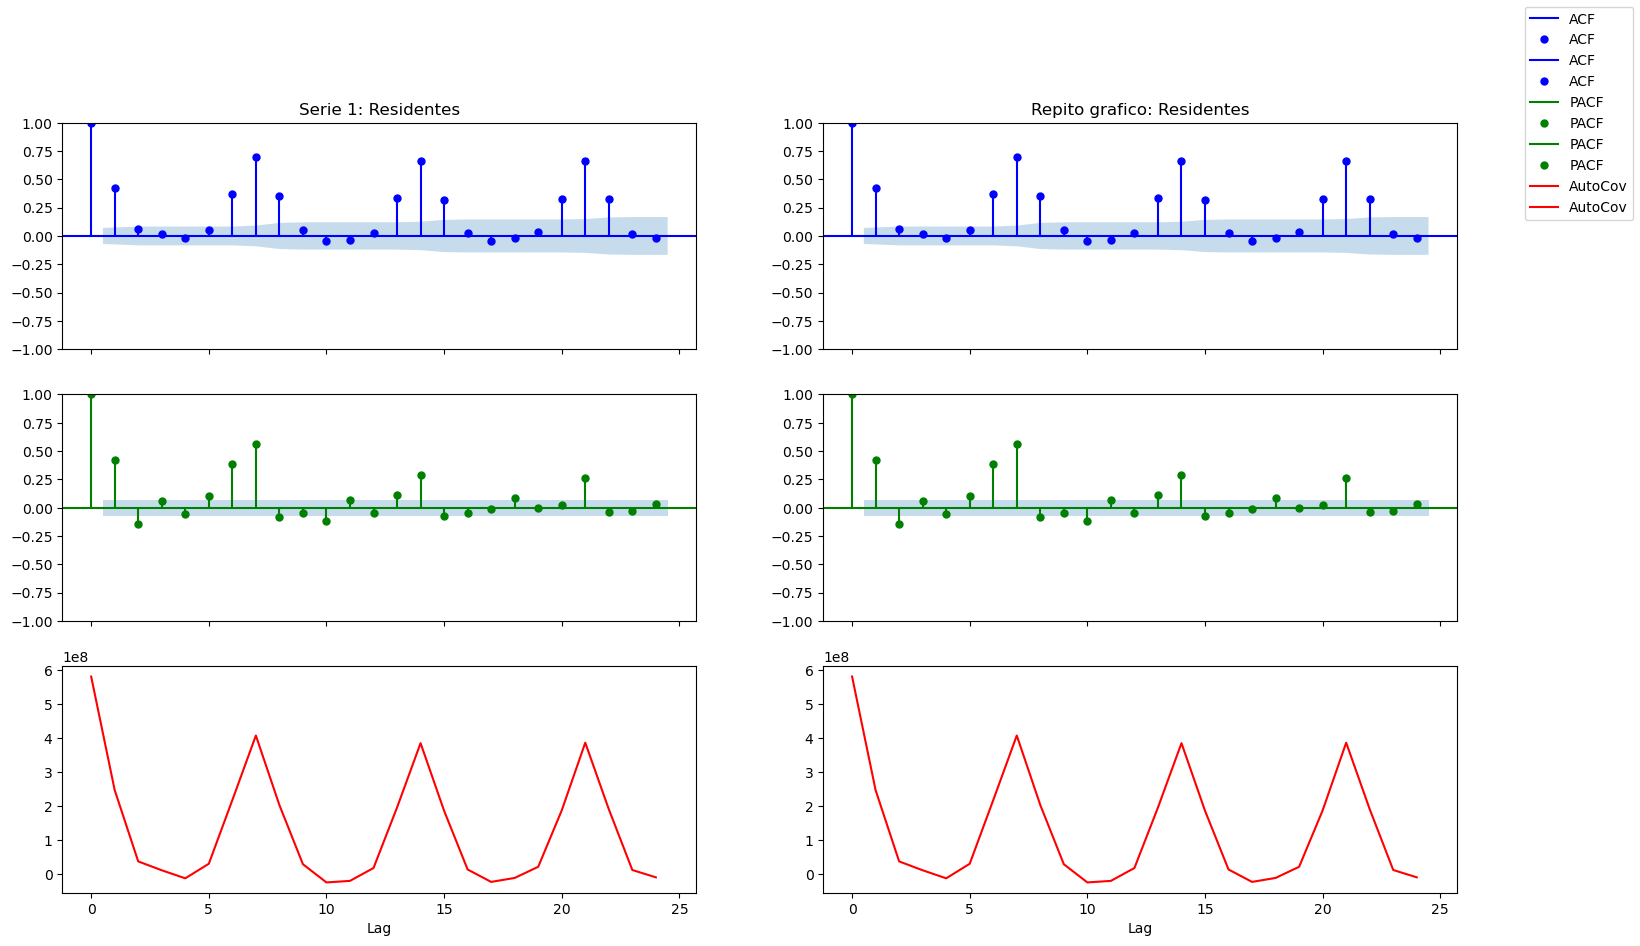

In [119]:
autocov_autocorr(df_km.KM, df_km.KM, 24)

# Pregunta 4

Realizar distintas pruebas de raíces unitarias para determinar si las series elegidas son o no estacionarias.

In [125]:
from statsmodels.tsa.stattools import adfuller

In [126]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Results of Dickey-Fuller Test for column: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Reject the null hypothesis")
    print("Data is stationary")
  else:
    print("Conclusion:====>")
    print("Fail to reject the null hypothesis")
    print("Data is non-stationary")

In [127]:
# Aplicamos Dicky Fuller
Augmented_Dickey_Fuller_Test_func(df_km,'KM')

Results of Dickey-Fuller Test for column: KM


ValueError: x is required to have ndim 1 but has ndim 2

In [130]:
# Dicky Fuller de la Serie diferenciada
Augmented_Dickey_Fuller_Test_func(km_diff ,'KM')

Results of Dickey-Fuller Test for column: KM


ValueError: x is required to have ndim 1 but has ndim 2